In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Column Names:
Category
Domestic air carriers
Truck
Class I rail
Oil pipeline
Producer price index
Water transportation (domestic)


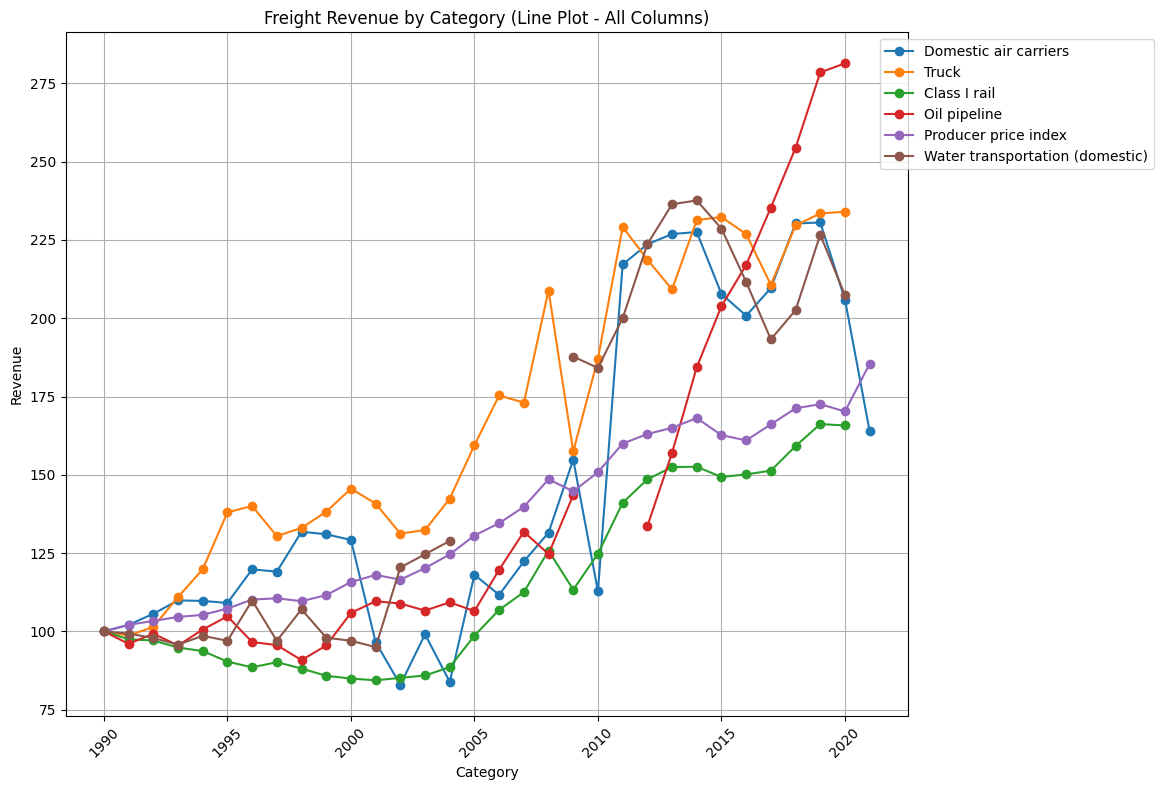

In [2]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('Freight Revenue.csv')

# Get the column names
column_names = df.columns

# Display the column names
print("Column Names:")
for col in column_names:
    print(col)

# Create a line plot for all columns
plt.figure(figsize=(12, 8))

# Plot all columns as lines
for col in column_names[1:]:
    plt.plot(df['Category'], df[col], label=col, marker='o')

plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title('Freight Revenue by Category (Line Plot - All Columns)')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
class FreightCostCalculator:
    def __init__(self, distance, weight, volume, fuel_cost, profit_margin):
        self.distance = distance  # Distance in miles
        self.weight = weight      # Weight in tons
        self.volume = volume      # Volume in cubic feet
        self.fuel_cost = fuel_cost        # Fuel cost per gallon
        self.insurance = 0        # Setting insurance cost to 0
        self.storage_fees = 0     # Setting storage fees to 0
        self.profit_margin = profit_margin  # Desired profit margin

        # Define the average freight ton per mile in dollars for the years 1990 to 2020
        self.average_freight_ton_per_mile = {
            1990: 1.00,
            1991: 1.01,
            1992: 1.11,
            1993: 1.20,
            1994: 1.38,
            1995: 1.40,
            1996: 1.30,
            1997: 1.33,
            1998: 1.38,
            1999: 1.45,
            2000: 1.41,
            2001: 1.31,
            2002: 1.32,
            2003: 1.42,
            2004: 1.59,
            2005: 1.75,
            2006: 1.73,
            2007: 2.09,
            2008: 1.57,
            2009: 1.87,
            2010: 2.29,
            2011: 2.19,
            2012: 2.09,
            2013: 2.31,
            2014: 2.32,
            2015: 2.27,
            2016: 2.11,
            2017: 2.30,
            2018: 2.33,
            2019: 2.26,
            2020: 2.27
        }

        # Calculate the average carrier rate over the years
        self.average_carrier_rate = sum(self.average_freight_ton_per_mile.values()) / len(self.average_freight_ton_per_mile) / 100  # Convert from cents to dollars
    def estimate_fuel_efficiency(self):
        base_efficiency = 6  # Base miles per gallon
        efficiency_loss_per_ton = 0.1  # Efficiency loss per ton of cargo

        efficiency = base_efficiency - (self.weight * efficiency_loss_per_ton)
        return max(efficiency, 1)  # Prevent efficiency from going below 1 mpg

    def calculate_fuel_costs(self):
        efficiency = self.estimate_fuel_efficiency()
        gallons_needed = self.distance / efficiency
        fuel_costs = gallons_needed * self.fuel_cost
        return fuel_costs

    def calculate_variable_costs(self):
        carrier_fees = self.weight * self.distance * self.average_carrier_rate
        fuel_costs = self.calculate_fuel_costs()
        return carrier_fees + fuel_costs

    def calculate_fixed_costs(self):
        # Calculate fixed costs (insurance and storage fees)
        return self.insurance + self.storage_fees

    def calculate_total_cost(self):
        # Calculate the variable costs
        variable_costs = self.calculate_variable_costs()

        # Calculate the fixed costs
        fixed_costs = self.calculate_fixed_costs()

        # Calculate the total cost including variable and fixed costs
        total_cost = variable_costs + fixed_costs

        # Calculate the desired profit as a percentage of the total cost
        desired_profit = total_cost * self.profit_margin

        # Add the profit to the total cost
        total_cost += desired_profit

        return total_cost

# Create an instance of the FreightCostCalculator with your data
calculator = FreightCostCalculator(
    distance = 60,        # Replace with the actual distance in miles
    weight= 40,          # Replace with the actual weight in tons
    volume= 20,          # Replace with the actual volume in cubic feet
    fuel_cost= 5.0,      # Replace with the current fuel cost per mile
    profit_margin= 0.15  # Replace with your desired profit margin (e.g., 0.10 for 10%)
)

# Calculate the total cost using the class method
total_cost = calculator.calculate_total_cost()

# Print the result
print(f"Estimated Total Cost (including profit margin): ${total_cost:.2f}")

Estimated Total Cost (including profit margin): $220.01


In [3]:
calculator.average_carrier_rate

0.01721290322580645